## Data visualization and analysis
- We will begin by importing the necessary libraries, such as Pandas and NumPy, for handling and analyzing our dataset. Then, we will load the dataset located at './dataset/tracks.csv' into a Pandas DataFrame. This will allow us to perform data visualization and analysis on the dataset. The first step is to explore the dataset and get familiar with its structure, columns, and basic statistics.

In [1]:
import pandas as pd
import numpy as np

# Load dataset
tracks_path = './dataset/tracks.csv'
tracks_df = pd.read_csv(tracks_path)

tracks_df.info()        # Display the basic information of the dataset
tracks_df.describe()    # Display the basic statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


### Clean Data and Remove Unnecessary Attributes
- We will now clean the dataset by removing any duplicate or missing values. This is an important step as it ensures the quality of our analysis and visualizations. Once the dataset is cleaned, we will display the basic information and statistics again to make sure the dataset is ready for further processing.


In [2]:
# Remove the duplicate rows and the rows with missing values
tracks_df.drop_duplicates(inplace=True)
tracks_df.dropna(inplace=True)  
tracks_df.reset_index(drop=True, inplace=True)

# Remove name, artists, id_artists, time_signature columns
tracks_df.drop(['name', 'artists', 'id_artists', 'time_signature'], axis=1, inplace=True)

# Display the basic information of the dataset
tracks_df.info()
tracks_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586601 entries, 0 to 586600
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   popularity        586601 non-null  int64  
 2   duration_ms       586601 non-null  int64  
 3   explicit          586601 non-null  int64  
 4   release_date      586601 non-null  object 
 5   danceability      586601 non-null  float64
 6   energy            586601 non-null  float64
 7   key               586601 non-null  int64  
 8   loudness          586601 non-null  float64
 9   mode              586601 non-null  int64  
 10  speechiness       586601 non-null  float64
 11  acousticness      586601 non-null  float64
 12  instrumentalness  586601 non-null  float64
 13  liveness          586601 non-null  float64
 14  valence           586601 non-null  float64
 15  tempo             586601 non-null  float64
dtypes: float64(9), int64

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


- This is to have consistent dates. All dates converted to year.

In [3]:
# Convert release_date to year only
tracks_df['year'] = pd.to_datetime(tracks_df['release_date'], format='mixed').dt.year
tracks_df.drop('release_date', axis=1, inplace=True)

# Display the first 5 rows of the dataset with the new 'year' column
tracks_df.head()


,id,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
0,35iwgR4jXetI318WEWsa1Q,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,1922
1,021ht4sdgPcrDgSk7JTbKY,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1922
2,07A5yehtSnoedViJAZkNnc,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,1922
3,08FmqUhxtyLTn6pAh6bk45,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,1922
4,08y9GfoqCWfOGsKdwojr5e,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,1922


### Visualize to Get Better Understanding of the Data

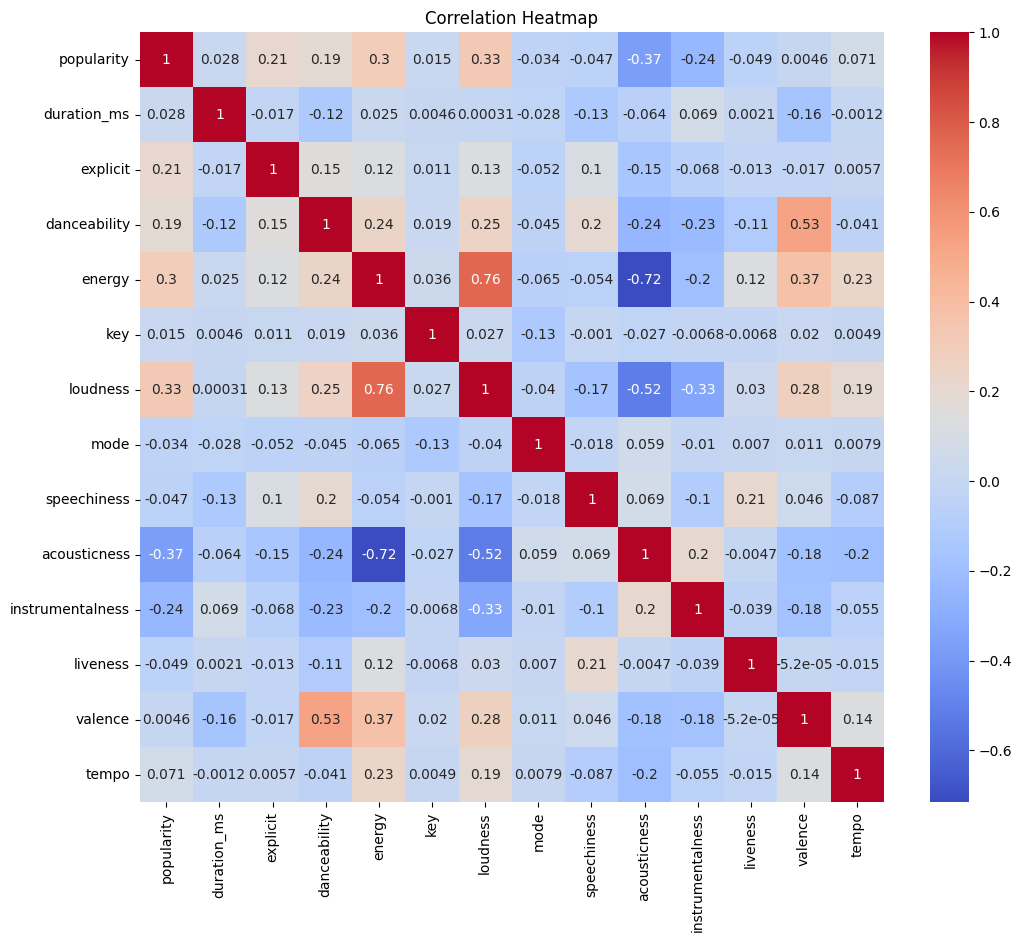

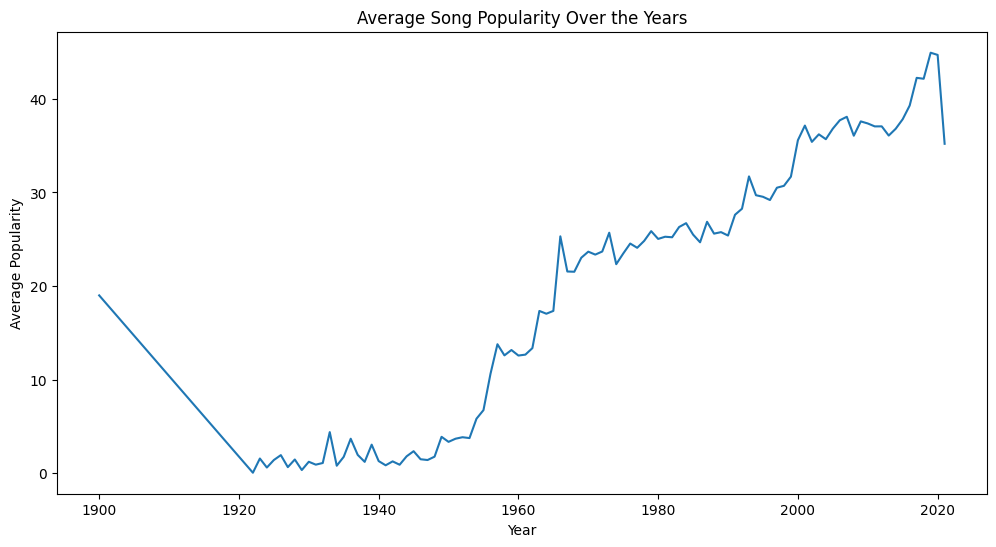

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix (excluding 'id' and 'release_date' columns)
numeric_columns = tracks_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = tracks_df[numeric_columns].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Group the dataset by year and calculate the average popularity
yearly_popularity = tracks_df.groupby('year')['popularity'].mean().reset_index()

# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_popularity, x='year', y='popularity')
plt.title("Average Song Popularity Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()




## Hypotheses testing

### Hypotheses One: Songs that are similar in their musical properties are likelyto be related to each other in a network

To create a network based on song property similarities, we can use the following approach:
- Calculate the similarity between songs using a similarity metric, such as cosine similarity or Euclidean distance.
- Set a similarity threshold to determine which songs are related to each other.
- Create a network (graph) using the song similarities, with songs as nodes and edges representing the relationships between similar songs.
- Analyze the network properties to prove or disprove your hypothesis.

Let's start by calculating the similarity between songs. We will use the cosine similarity metric in this case.

In [5]:
# Take a random sample of 1% of the dataset because of high memory load
sampled_tracks_df = tracks_df.sample(frac=0.01, random_state=42)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import networkx as nx

# Select features for similarity calculation  
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sampled_tracks_df[features])

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(scaled_data)

similarity_threshold = 0.98 # Higher threshold means fewer edges and sparser network but this helps to focus on most similar songs


# Initialize an empty graph
song_network = nx.Graph()

# Add nodes to the graph
song_network.add_nodes_from(sampled_tracks_df.index)

# Add edges between similar songs
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        if similarity_matrix[i][j] >= similarity_threshold:
            song_network.add_edge(i, j, weight=similarity_matrix[i][j])

# Add attributes to nodes
for i, row in sampled_tracks_df.iterrows():
    song_network.nodes[i]['popularity'] = row['popularity']
    for feature in features:
        song_network.nodes[i][feature] = row[feature]

### Degree Distribution

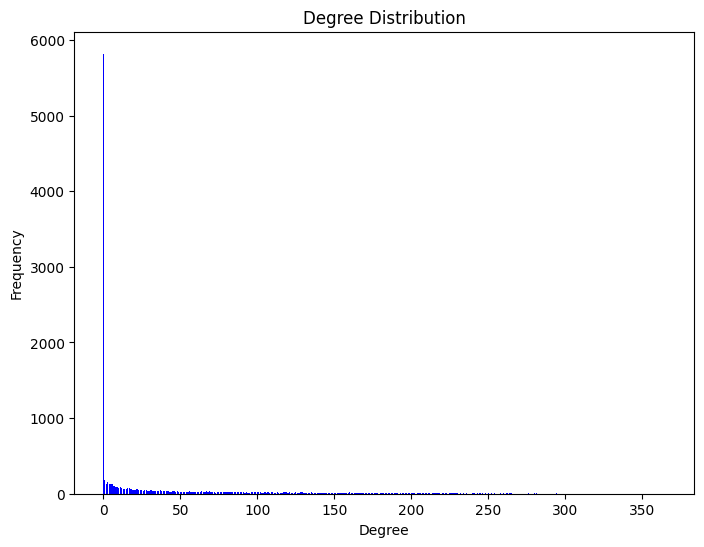

In [7]:
import collections
def degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())

    plt.figure(figsize=(8, 6))
    plt.bar(deg, cnt, width=0.80, color="b")
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

degree_distribution(song_network)

In [8]:
# Remove the nodes with degree 0 ie, isolated nodes
isolated_nodes = [n for n, d in song_network.degree() if d == 0]
print("Max Popularity in isolated nodes:", max([song_network.nodes[n]['popularity'] for n in isolated_nodes]))
print("Min Popularity in isolated nodes:", min([song_network.nodes[n]['popularity'] for n in isolated_nodes]))
print("Average Popularity in isolated nodes:", np.mean([song_network.nodes[n]['popularity'] for n in isolated_nodes]))

top_ten_isolated = sampled_tracks_df.loc[isolated_nodes].sort_values(by='popularity', ascending=False)

# Show top 10 songs with highest popularity form isolated nodes
print("Top 10 songs with highest popularity from isolated nodes:")
top_ten_isolated.head(10)


Max Popularity in isolated nodes: 85
Min Popularity in isolated nodes: 0
Average Popularity in isolated nodes: 27.832072877277415
Top 10 songs with highest popularity from isolated nodes:


,id,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
92959,2Z8yfpFX0ZMavHkcIeHiO1,85,178994,0,0.652,0.383,2,-7.076,0,0.0516,0.06760,0.000000,0.0828,0.549,145.765,2020
93887,54OBgO0Xwu20Jak9TMXbR7,84,155333,0,0.675,0.359,3,-5.157,1,0.1080,0.61400,0.000000,0.1370,0.792,191.903,2021
84077,0GO8y8jQk1PkHzS31d699N,83,218013,0,0.560,0.936,3,-5.835,1,0.0439,0.00847,0.000000,0.1610,0.371,112.960,2011
93053,2tFwfmceQa1Y6nRPhYbEtC,83,227520,1,0.807,0.606,3,-8.871,0,0.0880,0.09460,0.000000,0.1190,0.304,92.988,2020
91949,6Gg1gjgKi2AK4e0qzsR7sd,83,189323,1,0.474,0.631,5,-5.884,0,0.3430,0.06870,0.000000,0.1320,0.425,180.051,2019
94014,2dHoVW9AxJVSRebPRyV2aA,80,207164,0,0.647,0.377,6,-6.003,1,0.0375,0.59400,0.000000,0.0768,0.653,79.936,2021
94027,6rAGFY9D3ah6Lb7fUgbNNH,80,168118,0,0.447,0.553,0,-4.817,1,0.0322,0.21200,0.000000,0.1650,0.252,149.877,2021
93830,6YvqWjhGD8mB5QXcbcUKtx,79,235767,0,0.627,0.792,2,-4.311,1,0.0310,0.13000,0.000004,0.0845,0.415,119.054,2021
91109,27a1mYSG5tYg7dmEjWBcmL,78,198408,1,0.702,0.708,10,-5.366,0,0.0547,0.20100,0.000000,0.1180,0.713,147.980,2018
89029,4Ce37cRWvM1vIGGynKcs22,78,181880,0,0.728,0.616,4,-4.238,1,0.0645,0.37800,0.000000,0.1050,0.508,99.962,2016


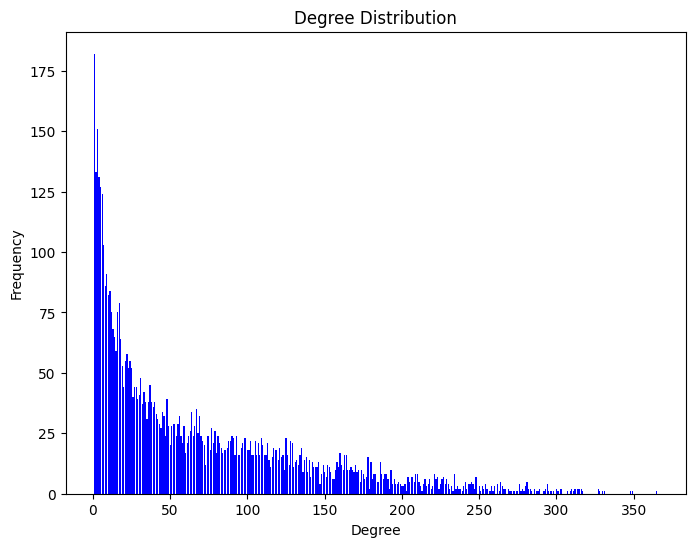

In [9]:
# Remove isolated nodes
song_network.remove_nodes_from(isolated_nodes)
degree_distribution(song_network)

# Remove the rows which in isolated nodes
sampled_tracks_df.drop(isolated_nodes, inplace=True)

### First Visualization Trials
- Visualizing large graphs can be challenging, but we can use the networkx library to save network as GEFX file along with Gephi to create a basic visualization of our graph.


In [10]:
num_nodes = song_network.number_of_nodes()
num_edges = song_network.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Number of nodes: 5688
Number of edges: 191688


### Clustering Coefficient

In [11]:
avg_clustering_coefficient = nx.average_clustering(song_network)
print("Average Clustering Coefficient:", avg_clustering_coefficient)


Average Clustering Coefficient: 0.4670404243001838


### Network Diameter

In [12]:
# Check if the network is connected
if nx.is_connected(song_network):
    network_diameter = nx.diameter(song_network)
    print("Network Diameter:", network_diameter)
else:
    print("The network is not connected, so the diameter is infinite.")


The network is not connected, so the diameter is infinite.


- A disconnected network is not necessarily a bad thing, as it can provide insights into the different groups or clusters of songs within the dataset. In many real-world networks, it is common to have disconnected components, as not all entities are connected to each other. The presence of disconnected components might indicate that there are distinct groups of songs with different characteristics or styles.

- When analyzing a disconnected network, it's important to consider the following:


### Connected components:
- Analyzing the connected components, their sizes, and their properties. We may find that some connected components have distinct characteristics, which can help us to understand the relationships between songs.

In [13]:
connected_components = list(nx.connected_components(song_network))
sorted_connected_components = sorted(connected_components, key=len, reverse=True)
number_of_connected_components = len(connected_components)

print("Number of connected components:", number_of_connected_components)
print("Sizes of the largest connected components:", [len(cc) for cc in sorted_connected_components[:5]])


Number of connected components: 21
Sizes of the largest connected components: [3792, 1850, 6, 4, 3]


- The community detection algorithm will group similar nodes together in the network. Then we can add the community attribute to the nodes so that we can visualize and analyze the clustering in Gephi.

In [14]:
from community import community_louvain

# Cluster nodes based on their similarities using the Louvain method
partition = community_louvain.best_partition(song_network)

# Add the community attribute to the nodes
for i, row in sampled_tracks_df.iterrows():
    song_network.nodes[i]['community'] = partition[i]


In [15]:
# Save the final network to a file
nx.write_gexf(song_network, "gephi/song_network_0.01.gexf")

# Year Series Analysis of Networks (Year By Year)

- Here's a function called generate_network_and_metrics that takes a DataFrame, a year, a similarity threshold, and a path to save the output files. This function applies all the steps in the provided code to create a network for the given year, and it saves the network to the specified path.

- Additionally, the function saves the network metrics, including the year and path, to a JSON file. The popularity value is also added as an attribute to each node. This popularity value will be used on Hypotheses Testing.

In [16]:
from by_year_analysis import NetworkGenerationThread

years = tracks_df['year'].unique()
features = ['danceability', 'energy', 'key', 'speechiness', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
similarity_threshold = 0.98
gephi_path = "./gephi/"
metrics_path = "./metrics/"

threads = []

# Create a thread for each year
for year in years:
    thread = NetworkGenerationThread(tracks_df[tracks_df["year"] == year].copy(), year, features, similarity_threshold, gephi_path, metrics_path)
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()


Generated network for 1922 with {'year': 1922, 'path': './gephi/song_network_1922.gexf', 'number_of_removed_isolated_nodes': 160, 'similarity_threshold': 0.98, 'num_nodes': 219, 'num_edges': 511, 'avg_clustering_coefficient': 0.4391213302172205, 'is_connected': False, 'number_of_connected_components': 13}.
Generated network for 1924 with {'year': 1924, 'path': './gephi/song_network_1924.gexf', 'number_of_removed_isolated_nodes': 633, 'similarity_threshold': 0.98, 'num_nodes': 593, 'num_edges': 8839, 'avg_clustering_coefficient': 0.6579087898081776, 'is_connected': False, 'number_of_connected_components': 15}.
Generated network for 1925 with {'year': 1925, 'path': './gephi/song_network_1925.gexf', 'number_of_removed_isolated_nodes': 903, 'similarity_threshold': 0.98, 'num_nodes': 834, 'num_edges': 13724, 'avg_clustering_coefficient': 0.657651433464748, 'is_connected': False, 'number_of_connected_components': 14}.
Generated network for 1929 with {'year': 1929, 'path': './gephi/song_netwo

Exception in thread Thread-105:
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/by_year_analysis.py", line 127, in run
    process_year(
  File "/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/by_year_analysis.py", line 96, in process_year
    song_network, metrics = generate_network_by_year(
  File "/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/by_year_analysis.py", line 71, in generate_network_by_year
    "avg_clustering_coefficient": nx.average_clustering(song_network),
  File "/Users/emirkantul/Documents/Repos/song-popularities-and-properties-during-time/.venv/lib/python3.9/site-packages/networkx/classes/backends.py", line 148, in wrapper
    return func(*args, **kwds)
  File "/Users/emirka

Generated network for 2009 with {'year': 2009, 'path': './gephi/song_network_2009.gexf', 'number_of_removed_isolated_nodes': 9593, 'similarity_threshold': 0.98, 'num_nodes': 9423, 'num_edges': 688620, 'avg_clustering_coefficient': 0.4980323889261145, 'is_connected': False, 'number_of_connected_components': 27}.
Generated network for 2001 with {'year': 2001, 'path': './gephi/song_network_2001.gexf', 'number_of_removed_isolated_nodes': 7259, 'similarity_threshold': 0.98, 'num_nodes': 7042, 'num_edges': 308977, 'avg_clustering_coefficient': 0.47052584558083443, 'is_connected': False, 'number_of_connected_components': 49}.
Generated network for 2004 with {'year': 2004, 'path': './gephi/song_network_2004.gexf', 'number_of_removed_isolated_nodes': 9251, 'similarity_threshold': 0.98, 'num_nodes': 9086, 'num_edges': 629293, 'avg_clustering_coefficient': 0.4938304569958689, 'is_connected': False, 'number_of_connected_components': 33}.
Generated network for 1999 with {'year': 1999, 'path': './ge